In [49]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from re import split
from pathlib import Path
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sb.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Common

- Convert times to `[s]`
- Calculate total number of domain points
- Calculate total number of stencil points

In [265]:
def params_tokenizer(x):
    # Break paramesters string into tokens
    benchTokens = split(' |/|D:/', x)
    numTokens = len(benchTokens)
    
    # Piece together benchmark name
    name = benchTokens[0]
    for idx in range(1, numTokens - 4):
        name += benchTokens[idx]
        
    # Extract remaining parameters
    numType = benchTokens[numTokens - 4]
    dims = int(benchTokens[numTokens - 3])
    domLen = int(benchTokens[numTokens - 2])
    stenLen = int(benchTokens[numTokens - 1])
    return [benchName, numType, dims, domLen, stenLen]

def data_reader(fileName):
    # Read data
    df_raw = pd.read_csv(fileName, skiprows=3)

    # Extract parameters
    params = df_raw['name'].apply(params_tokenizer).tolist()

    # Add parameter columns 
    df = pd.DataFrame(params).join(df_raw)

    # Drop unused columns
    df.drop(['time_unit', 'bytes_per_second', 'items_per_second', 
             'label', 'error_occurred', 'error_message', 'name'], 
            axis=1, inplace=True)
    
    # Rename remaining columns
    df.columns = ['Kernel', 'Number type', 'Dimensions', 'Domain length', 
                  'Stencil length', 'Iterations', 'Real time [ns]', 
                  'CPU time [ns]']

    df['Real time [s]'] = df['Real time [ns]'].apply(lambda x: x * 1e-9)
    df['CPU time [s]'] = df['CPU time [ns]'].apply(lambda x: x * 1e-9)
    df['Stencil points'] = df['Stencil length'].pow(df['Dimensions'])
    df['Domain points'] = df['Domain length'].pow(df['Dimensions'])
    
    return df

# sq


## laptop

In [266]:
df = data_reader('laptop_sq.csv')
df.head()

,Kernel,Number type,Dimensions,Domain length,Stencil length,Iterations,Real time [ns],CPU time [ns],Real time [s],CPU time [s],Stencil points,Domain points
0,SQ,float,1,4096,1,102081,6997.54,6940.84,0.000007,0.000007,1,4096
1,SQ,float,1,4096,2,101358,6924.85,6901.55,0.000007,0.000007,2,4096
2,SQ,float,1,65536,1,30192,23318.90,23256.30,0.000023,0.000023,1,65536
3,SQ,float,1,65536,2,30014,23365.90,23308.60,0.000023,0.000023,2,65536
4,SQ,float,1,1048576,1,2468,284042.00,282081.00,0.000284,0.000282,1,1048576


In [268]:
dfFilter = (df['Number type'] == 'float') & \
           (df['Stencil length'] == 1)

,Kernel,Number type,Dimensions,Domain length,Stencil length,Iterations,Real time [ns],CPU time [ns],Real time [s],CPU time [s],Stencil points,Domain points
0,SQ,float,1,4096,1,102081,6997.54,6940.84,0.000007,0.000007,1,4096
2,SQ,float,1,65536,1,30192,23318.90,23256.30,0.000023,0.000023,1,65536
4,SQ,float,1,1048576,1,2468,284042.00,282081.00,0.000284,0.000282,1,1048576
6,SQ,float,1,16777216,1,147,4802310.00,4762480.00,0.004802,0.004762,1,16777216
8,SQ,float,2,64,1,101970,6880.65,6865.47,0.000007,0.000007,1,4096


In [282]:
dfPlot = df[dfFilter].pivot_table(index=['Domain points'], 
                                  columns=['Dimensions'], 
                                  values='Real time [s]')

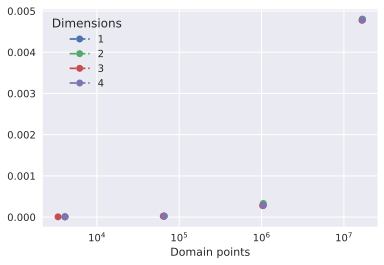

In [299]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
dfPlot.plot(ax=ax, logx=True, style=['o--', 'o--', 'o--', 'o--'])
#ax.set_yscale('log')
# TODO: change formatting of number of points

In [250]:
#fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
#timesData.plot(ax=ax, style=['o--', 'o--', 'o--'])
#ax.set_ylabel('Time [s]')
#ax.set_title('Laplace 3D \n Weak scaling')

#fig.savefig('laptop_sq.png')

## jureca

## julia

# axpy

# dot

# assign scalar

# assign vector

# stencil core apply

# stencil shell apply